# Flight Price Prediction

## Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the train dataset
flight_train = pd.read_excel(r'C:\Users\Devu\Desktop\Harshitha files\Flight_Ticket_Participant_Datasets-20190305T100527Z-001 (1)\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')

In [4]:
#reading the test dataset
flight_test = pd.read_excel(r'C:\Users\Devu\Desktop\Harshitha files\Flight_Ticket_Participant_Datasets-20190305T100527Z-001 (1)\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [5]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
flight_train.shape

(10683, 11)

In [8]:
flight_test.shape

(2671, 10)

In [9]:
flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
#checking the column types
flight_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
#checking the null values in a train dataset
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
#checking the null values in a test dataset
flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [13]:
#flight_train = flight_train.dropna()
flight_train[flight_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [14]:
flight_train['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [15]:
flight_train['Total_Stops'].mode()

0    1 stop
dtype: object

In [16]:
#inserting the most repeated route column value in null valued row
flight_train.loc[9039,'Route']='DEL → BOM → COK'
flight_train.loc[9039,'Total_Stops']='1 stop'

In [17]:
flight_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

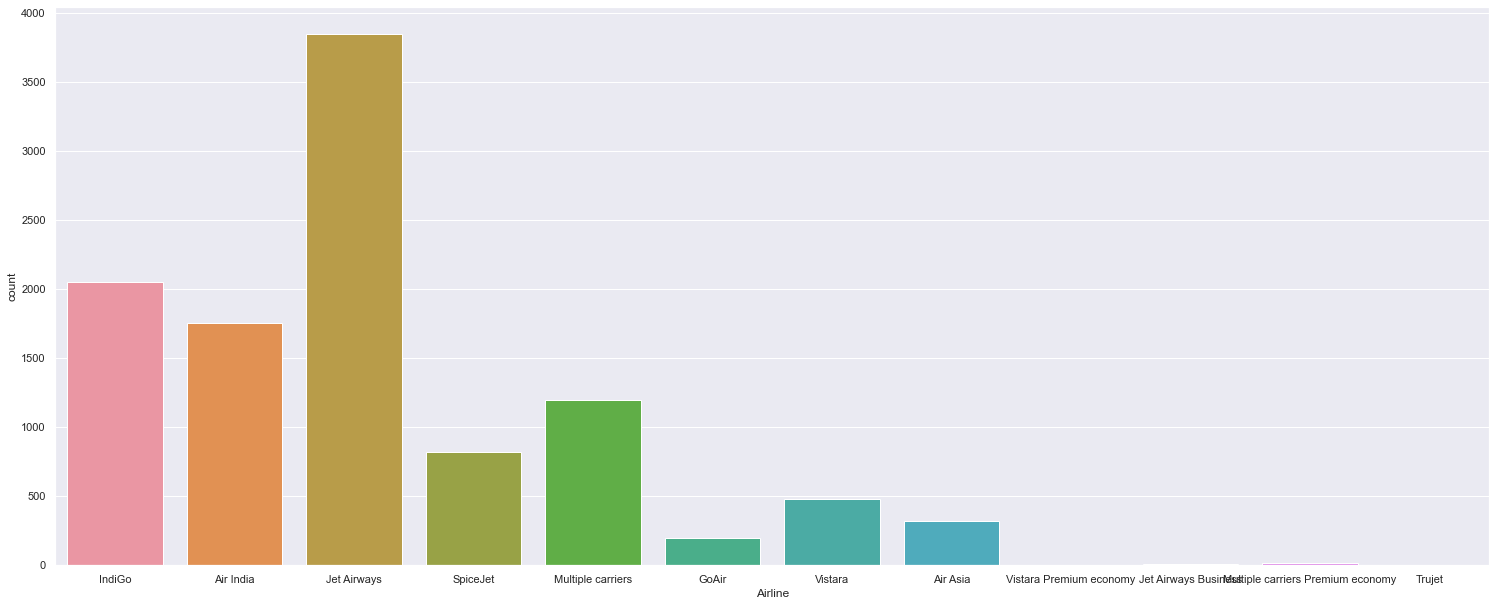

In [20]:
#Analysis of the various airlines 
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(flight_train['Airline'])

In [21]:
flight_train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [22]:
pd.crosstab(flight_train['Source'],flight_train['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,932
Chennai,0,0,0,0,381,0
Delhi,0,4537,0,0,0,0
Kolkata,2871,0,0,0,0,0
Mumbai,0,0,0,697,0,0


You can see that more number of flights is between delhi to cochi. So this may be the busiest route

In [23]:
#row of the entire dataset where the price is maximum
flight_train.loc[flight_train['Price'].idxmax()]

Airline            Jet Airways Business
Date_of_Journey              01/03/2019
Source                         Banglore
Destination                   New Delhi
Route                   BLR → BOM → DEL
Dep_Time                          05:45
Arrival_Time                      11:25
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          Business class
Price                             79512
Name: 2924, dtype: object

In [24]:
#row of the entire dataset where the price is miniimum
flight_train.loc[flight_train['Price'].idxmin()]

Airline                SpiceJet
Date_of_Journey      21/03/2019
Source                   Mumbai
Destination           Hyderabad
Route                 BOM → HYD
Dep_Time                  22:45
Arrival_Time       00:10 22 Mar
Duration                 1h 25m
Total_Stops            non-stop
Additional_Info         No info
Price                      1759
Name: 4066, dtype: object

In [25]:
flight_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [26]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Most of the people are travelling in the month of june

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

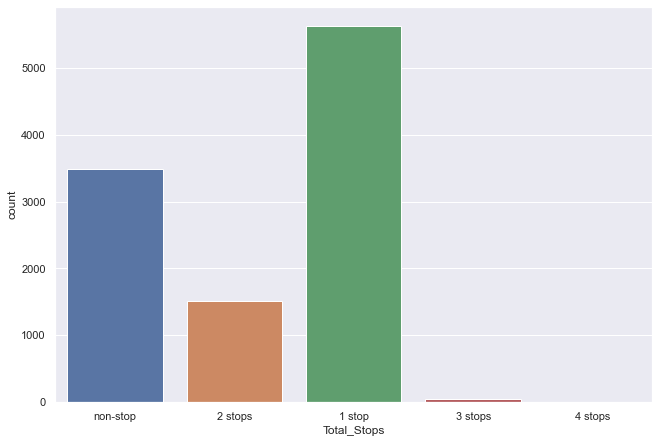

In [27]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.countplot(flight_train['Total_Stops'])

In [28]:
#stats of airlines with total stops
pd.crosstab(flight_train['Airline'],flight_train['Total_Stops'])

Total_Stops,1 stop,2 stops,3 stops,4 stops,non-stop
Airline,,,,,
Air Asia,129,9,0,0,181
Air India,541,756,37,1,417
GoAir,102,0,0,0,92
IndiGo,793,19,0,0,1241
Jet Airways,2535,691,0,0,623
Jet Airways Business,4,2,0,0,0
Multiple carriers,1145,43,8,0,0
Multiple carriers Premium economy,13,0,0,0,0
SpiceJet,148,0,0,0,670


## Feature Engineering

In [29]:
#extracting the month from the flight date
flight_train['Date_of_Journey'] = pd.to_datetime(flight_train['Date_of_Journey'])
flight_train['Month_of_Journey'] = flight_train['Date_of_Journey'].dt.month
flight_train['Day_of_Journey'] = flight_train['Date_of_Journey'].dt.day

In [30]:
flight_train['Month_of_Journey'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month_of_Journey, dtype: int64

In [38]:
#extracting the month from the flight date
flight_test['Date_of_Journey'] = pd.to_datetime(flight_test['Date_of_Journey'])
flight_test['Month_of_Journey'] = flight_test['Date_of_Journey'].dt.month
flight_test['Day_of_Journey'] = flight_test['Date_of_Journey'].dt.day

In [32]:
flight_train.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Month_of_Journey             int64
Day_of_Journey               int64
dtype: object

In [33]:
#preproceesing the duration
duration = list(flight_train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_train['Duration_hours'] = dur_hours
flight_train['Duration_minutes'] =dur_minutes

In [34]:
#for test dataset
duration = list(flight_test['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_test['Duration_hours'] = dur_hours
flight_test['Duration_minutes'] =dur_minutes

In [35]:
#droping the duration column in train dataset
flight_train = flight_train.drop(labels='Duration',axis=1)

In [36]:
#droping the duration column in test dataset
flight_test = flight_test.drop(labels='Duration',axis=1)

In [37]:
#featuring the departure_time and arrival_time
flight_train['Dep_Time'] = pd.to_datetime(flight_train['Dep_Time'])
flight_train['Arrival_Time'] = pd.to_datetime(flight_train['Arrival_Time'])
flight_train['Dep_Time_hours'] = flight_train['Dep_Time'].dt.hour
flight_train['Dep_Time_minutes'] = flight_train['Dep_Time'].dt.minute
flight_train['Arr_Time_hours'] = flight_train['Arrival_Time'].dt.hour
flight_train['Arr_Time_minutes'] = flight_train['Arrival_Time'].dt.minute

In [39]:
#featuring the departure_time and arrival_time
flight_test['Dep_Time'] = pd.to_datetime(flight_test['Dep_Time'])
flight_test['Arrival_Time'] = pd.to_datetime(flight_test['Arrival_Time'])
flight_test['Dep_Time_hours'] = flight_test['Dep_Time'].dt.hour
flight_test['Dep_Time_minutes'] = flight_test['Dep_Time'].dt.minute
flight_test['Arr_Time_hours'] = flight_test['Arrival_Time'].dt.hour
flight_test['Arr_Time_minutes'] = flight_test['Arrival_Time'].dt.minute

In [40]:
#dropping the orginal columns
flight_train = flight_train.drop(labels={'Dep_Time','Arrival_Time'},axis=1)

In [41]:
flight_test = flight_test.drop(labels={'Dep_Time','Arrival_Time'},axis=1)

In [42]:
flight_train = flight_train.drop(labels='Route',axis=1)

In [43]:
flight_train['Price'].groupby(flight_train['Total_Stops']).mean()
#as you can see that 4 stops flights has more price in mean terms

Total_Stops
1 stop      10593.570032
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
non-stop     5024.900315
Name: Price, dtype: float64

In [46]:
#dropping the date of journey column in train data
flight_train = flight_train.drop(labels='Date_of_Journey',axis=1)

In [47]:
#dropping the date of journey column in test data
flight_test = flight_test.drop(labels='Date_of_Journey',axis=1)

In [48]:
flight_train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [49]:
flight_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [50]:
flight_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,24,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,4,45,16,50,21,35


In [51]:
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,2,50,23,55,2,45


In [52]:
flight_train_orginal = flight_train.copy()

In [53]:
flight_test_orginal  = flight_test.copy()

## Encoding 

In [54]:
#using the label encoder
le1 = LabelEncoder()
le2 = LabelEncoder()

In [55]:
#dependent varaible
Y_Train = flight_train.iloc[:,6].values

In [56]:
#independent varaibles
X_Train = flight_train.iloc[:,flight_train.columns!='Price'].values

In [57]:
X_Train.shape

(10683, 13)

In [61]:
X_Train[:,0] = le1.fit_transform(X_Train[:,0])
X_Train[:,1] = le1.fit_transform(X_Train[:,1])
X_Train[:,2] = le1.fit_transform(X_Train[:,2])
X_Train[:,3] = le1.fit_transform(X_Train[:,3])
X_Train[:,4] = le1.fit_transform(X_Train[:,4])
X_Train[:,5] = le1.fit_transform(X_Train[:,5])
X_Train[:,12] = le1.fit_transform(X_Train[:,12])

In [62]:
X_Test = flight_test.iloc[:,:].values
X_Test[:,0] = le2.fit_transform(X_Test[:,0])
X_Test[:,1] = le2.fit_transform(X_Test[:,1])
X_Test[:,2] = le2.fit_transform(X_Test[:,2])
X_Test[:,3] = le2.fit_transform(X_Test[:,3])
X_Test[:,4] = le2.fit_transform(X_Test[:,4])
X_Test[:,5] = le2.fit_transform(X_Test[:,5])
X_Test[:,12] = le2.fit_transform(X_Test[:,12])

In [63]:
pd.DataFrame(X_Test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4,2,1,76,0,5,6,6,10,55,17,30,4,25
1,3,3,0,65,0,5,12,5,4,0,6,20,10,20
2,4,2,1,76,0,3,5,21,23,45,19,15,19,0
3,6,2,1,76,0,5,5,21,13,0,8,0,21,0
4,0,0,2,16,4,5,6,24,2,50,23,55,2,45


## Scaling using standard scaler

In [64]:
sc = StandardScaler()

In [65]:
X_Train = sc.fit_transform(X_Train)

In [66]:
X_Test = sc.transform(X_Test)

ValueError: X has 14 features, but this StandardScaler is expecting 13 features as input.